# Homework 5

## Problem 1: Faceted Histogram

Run the following code block to define a function which generates two 1-dimensional `numpy` arrays. The first array, called `groups`, consists of integers between `0` and `n_groups - 1`, inclusive. The second array, called `data`, consists of real numbers. 

In [6]:
import numpy as np
from matplotlib import pyplot as plt

def create_data(n, n_groups):
    """
    generate a set of fake data with group labels. 
    n data points and group labels are generated. 
    n_groups controls the number of distinct groups. 
    Returns an np.array() of integer group labels and an 
    np.array() of float data. 
    """
    
    # random group assignments as integers between 0 and n_groups-1, inclusive
    groups = np.random.randint(0, n_groups, n)
    
    # function of the groups plus gaussian noise (bell curve)
    data   = np.sin(groups) + np.random.randn(n)
    
    return(groups, data)

## Part A

Write a function called `facet_hist()`. This function should accept five arguments: 

1. `groups`, the `np.array` of group labels as output by `create_data()`. 
2. `data`, the `np.array` of data as output by `create_data()`.
3. `m_rows`, the number of desired rows in your faceted histogram (explanation coming). 
4. `m_cols`, the number of desired columns in your faceted histogram (explanation coming). 
5. `figsize`, the size of the figure. 

Your function will create faceted histograms -- that is, a separate axis and histogram for each group. For example, if there are six groups in the data, then you should be able to use the code 

```python
groups, data = create_data(1000, 6)
facet_hist(groups, data, m_rows = 2, m_cols = 3, figsize = (6,4))
```

to create a plot like this: 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram.png
" alt="An array of six histograms, depicting bell-curve data, with two rows and three columns. Each histogram is labeled with one of the six group labels." width="400px">
</figure>

It's fine if your group labels run left-to-right (so that the top row has labels 0, 1, and 2 rather than 0, 2, 4). 


You should also be able to change the orientation by modifying `m_rows`, `m_cols`, and `figsize`. 

```
facet_hist(groups, data, m_rows = 3, m_cols = 2, figsize = (4,6))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_2.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels." width="300px">
</figure>

### Requirements: 

1. Your function should work **whenever `m_rows*m_cols` is equal to the total number of groups.** Your function should first check that this is the case, and raise an informative `ValueError` if not. You may assume that there is at least one data point for each group label in the data supplied. 
2. For full credit, you should not loop over the individual entries of `groups` or `data`. It is acceptable to loop over the distinct values of `groups`. In general, aim to minimize `for`-loops and maximize use of `Numpy` indexing. 
2. Use of `pandas` is acceptable but unnecessary, and is unlikely to make your solution significantly simpler. 
2. You should include a horizontal axis label (of your choice) along **only the bottom row** of axes. 
3. You should include a vertical axis label (e.g. "Frequency") along **only the leftmost column of axes.**
4. Each axis should have an axis title of the form "Group X", as shown above. 
5. Comments and docstrings! 

### Hints

- If your plots look "squished," then `plt.tight_layout()` is sometimes helpful. Just call it after constructing your figure, with no arguments. 
- Integer division `i // j` and remainders `i % j` are helpful here, although other solutions are also possible. 


In [7]:
# your solution here
def facet_hist(groups, data, m_rows, m_cols, figsize, **kwargs):
    '''
    Function that creates faceted histograms 
    Takes in the following data: 
    - groups , the np.array of group labels as output by create_data() .
    - data , the np.array of data as output by create_data() .
    - m_rows , the number of desired rows in your faceted histogram .
    - m_cols , the number of desired columns in your faceted histogram ). 
    - figsize , the size of the figure.
    - **kwargs passed to ax.hist()
    
    '''
    # raise value erorr when m_rows*m_cols not equal to num of groups
    numGroups = np.max(groups) + 1  # number of groups 
    rowxcol = m_rows * m_cols       # rows mult cols
    if numGroups != rowxcol:
        raise ValueError("Row and columns must multiply to equal the num of groups")
    
    # make histograms
    fig, ax = plt.subplots(m_rows, m_cols, figsize = figsize)
    subplotCount = 0 #counter 
    for x in range(m_rows): #go through rows
        for y in range(m_cols): #go through cols
            #also add kwargs for other argumennts
            ax[x][y].hist(data[groups == subplotCount], **kwargs)
            ax[x][y].set(title = "Group " + str(subplotCount))
            subplotCount += 1 
    plt.tight_layout() #pyplot function to space out plots
    
    #adding labels - only on bottom and lefthand sides
    for bottomLabel in range(m_cols):
        ax[m_rows-1][bottomLabel].set(xlabel = 'x')
    for leftLabel in range(m_rows): 
        ax[leftLabel][0].set(ylabel = 'Frequency')


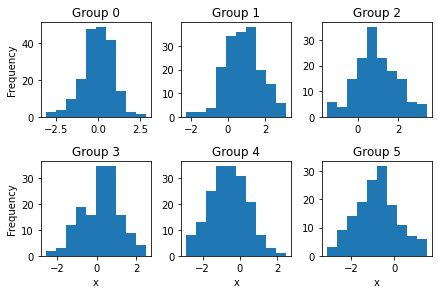

In [8]:
# test code
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4))

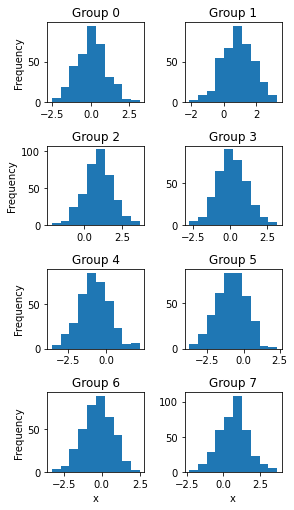

In [9]:
# test code
groups, data = create_data(3000, 8)
facet_hist(groups, data, 4, 2, figsize = (4, 7))

## Part B

Modify your function (it's ok to modify it in place, no need for copy/paste) so that it accepts additional `**kwargs` passed to `ax.hist()`. For example,  

```
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")
```

should produce 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_3.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels. The histograms are now colored pink and are slightly transparent.|" width="400px">
  <figcaption><i>Example output.</i></figcaption>
</figure>

You should be able to run this code **without defining parameters `alpha` and `color` for `facet_hist()`.** 

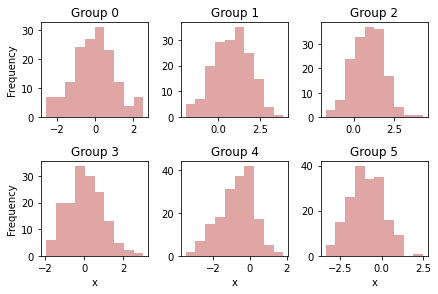

In [10]:
# run this code to show that your modified function works
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")

## Problem 2: Scatterplot Matrices

Run the following code to download, import, and display a data set from the 2019 World Happiness Report. 

In [13]:
# if you experience ConnectionRefused errors, you may instead 
# copy the url into your browser, save the file as data.csv 
# in the same directory as the notebook, and then replace the 
# third line with 
# happiness = pd.read_csv("data.csv")

import pandas as pd
url = "https://philchodrow.github.io/PIC16A/datasets/world_happiness_report/2019.csv"
happiness = pd.read_csv(url)
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


This is a `pandas` data frame. Observe the following: 

1. Each row corresponds to a country or region. 
2. The `Score` column is the overall happiness score of the country, evaluated via surveys. 
3. The other columns give indicators of different features of life in the country, including GDP, level of social support, life expectancy, freedom, generosity of compatriots, and perceptions of corruption in governmental institutions. 

 You can extract each of these columns using dictionary-like syntax: 
 
 ```python
 happiness["Score"]
 ```
 
 ```
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64
 ```
 
Technically, this output is a `pandas` `Series`; however, in this context (and most others) it's fine to simply think of it as a 1-dimensional `np.array()`. 

### Part A

As a warmup, create a scatterplot of the overall `Score` column against a numerical column of your choice. Give the horizontal and vertical axes appropriate labels. Discuss your result. Is there a correlation? Does that correlation make sense to you? 

[Text(0.5, 0, 'Score'), Text(0, 0.5, 'Social support')]

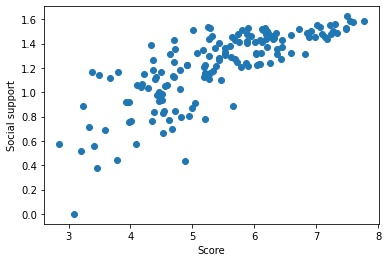

In [17]:
# plotting code here
# plotting score vs social support
fig, ax = plt.subplots(1)
ax.scatter(happiness["Score"], happiness["Social support"]) 
ax.set(xlabel = "Score",ylabel = "Social support") 


---

*Discuss here*

From this chart we can see there tends there seems to be an upward trend. As the social support increases, the score for the country will increase as well. This would make sense as humans live in a community and need our community, so we are happier when we support others. 

---

## Part B

That plot you made may have helped you understand whether or not there's a relationship between the overall happiness score and the variable that you chose to plot. However, there are several variables in this data set, and we don't want to manually re-run the plot for each pair of variables. Let's see if we can get a more systematic view of the correlations in the data. 

Write a function called `scatterplot_matrix()`, with arguments `cols` and `figsize`. The `cols` argument should be a list of strings, each of which are the name of one of the columns above, for example `cols = ["Score", "GDP per capita", "Social support"]`. Your function should create a *scatterplot matrix*, like this:  

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other." width="400px">
</figure>

There is a separate scatterplot for each possible pair of variables. In fact, there are two: one where the first variable is on the horizontal axis, and one where it's on the vertical axis. Some analysts prefer to remove half the plots to avoid redundancy, but you don't have to bother with that. The diagonal is empty, since there's no point in investigating the relationship between a variable and itself. 

Don't forget comments and docstrings! 

In [18]:
# define your function
def scatterplot_matrix(cols, figsize):
    '''
    Create scatterplot matrix that takes in arguments:
    - cols : should be a list of strings, each of which are the name of one of the columns
    - figsize : size of scatterplots
    '''
    
    #num of cols
    numCol = len(cols)
    
    #matrix of scatterplots 
    fig, ax = plt.subplots(numCol, numCol, figsize = figsize)
    for graph in range(numCol): #go through each subplot
        for c in reversed(range(numCol)): 
            #do not graph variable vs itself 
            if graph is not c: 
                ax[graph, c].scatter(happiness[cols[graph]], happiness[cols[c]])
            
            #labels for x and y axis (part b)
            #ax[graph, c].set(xlabel = cols[graph], ylabel = cols[c])
            
            #PART C changes
            #correlation coefficient - calculate then round
            coef = np.corrcoef(happiness[cols[graph]],happiness[cols[c]])
            coef = np.round(coef[0,1],2) 
            ax[graph, c].set(title = cols[graph], 
                             xlabel = r"$\rho$ = " + str(coef),
                             ylabel = cols[c])
            plt.tight_layout()
    


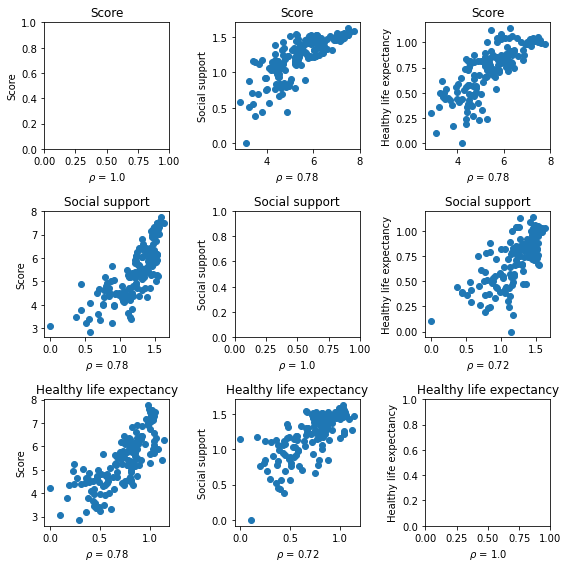

In [27]:
# test your code, several times if needed, and discuss the correlations you observe. 
# Add code cells if needed to show multiple outputs. 
cols = ["Score", "Social support", "Healthy life expectancy"] 
scatterplot_matrix(cols,figsize = (8,8))

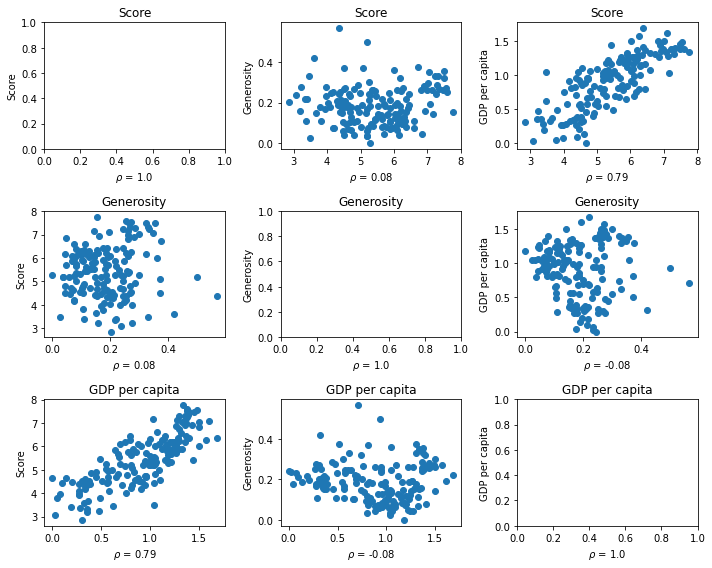

In [25]:
cols = ["Score","Generosity", "GDP per capita"] 
scatterplot_matrix(cols,figsize = (10,8))

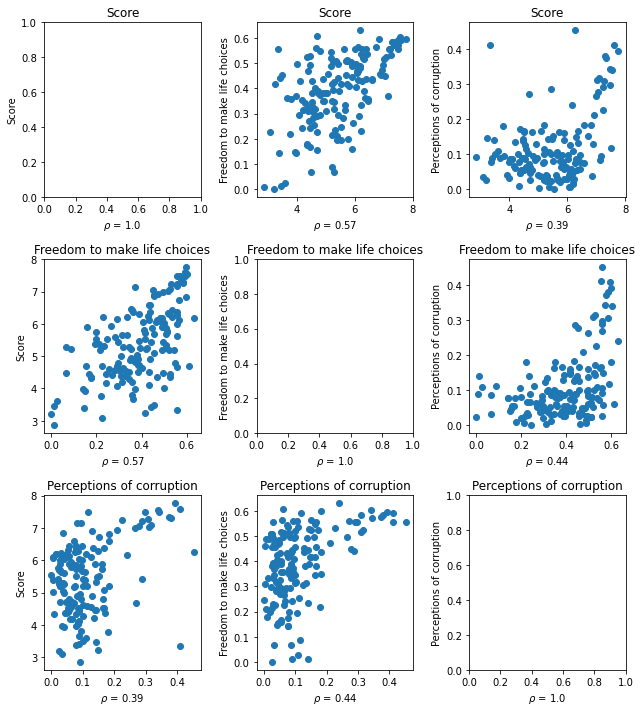

In [175]:
cols = ["Score","Freedom to make life choices","Perceptions of corruption"] 
scatterplot_matrix(cols,figsize = (9,10))

## Part C

The *correlation coefficient* is a measure of linear correlation between two variables. The correlation coefficient between $X$ and $Y$ is high if $X$ tends to be high when $Y$ is, and vice versa. Correlation coefficients lie in the interval $[-1, 1]$. 

`numpy` provides a function to conveniently compute the correlation coefficient between two or more variables. Find it, and then use it to add "captions" (as horizontal axis labels) to each panel of your plot giving the correlation coefficient between the plotted variables. For example, 

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix_with_cors.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other. Correlation coefficients between 0.70 and 0.84 lie beneath each plot." width="400px">
</figure>

It's not required that you add the Greek letter $\rho$ (the classical symbol for correlation coefficients), but if you do want to, here's how. You can also tweak the rounding as desired.  

```python
ax.set(xlabel = r"$\rho$ = " + str(np.round(my_number, 2)))
```


Run your code on several different subsets of the columns. It's ok to simply re-run your  Part B results where they are and show the output including the correlation coefficient. Discuss your findings. What positive correlations do you observe? Do they make sense? Are there any negative correlations? Do the quantitative results match what you see "by eye"? 

If you were going to create a model to attempt to predict overall happiness from other indicators, which columns would you use? Why? 

---

*Discuss here*

I ran my function 3 times to make 3 different scatterplot matrices. The groups of categories I compared were:
1) Score, Social Support, Healthy Life Expectancy

2) Score, Generousity, GPD Per Capita

3) Score, Freedom to Make Life Choices, Perception of Corruptions

From these 3 sets of data I saw that first group (score, social support, and healthy life expectancy) overall had the highest correlation values. The scores are all in the range of 0.7 to 0.8. This is much higher than my other two groups. The data also all showed an upward trend. It seems that with more happiness, there is more social support and with more social support, there is a better life expectancy and the trend follows for all the components. Overall it seems that more social support, happiness, and life expectancy will generally lead for poeple to have a better quality of life. I find that these results make sense as all these factors are what people strive to achieve in today's society. 

In my other two sets of data, the third group had more consistent results that the second group. My third group of data was about the happiness score, freedom to make life choices, and ones perception of corruptions. Overall there tends to be an upward trend with a positive correlation for all the plots in this group. However, some of plots look like they would fit better with an exponential trend rather than a linear trend. For exmaple, freedom to make life choices vs score seems to fit a liner pattern but freedom to make life choices and perceptions of happiness would fit better on an exponential curve. With the exponential curves, for one graph there will be a growing exponential while when the characteristics are switch axes, there will be a decaying exponential. I find this really interesting because depending on whether the graph is a growing or decaying exponential, it may change how I intrepret the data. For example, it seems that once we have a lot of freedom to make life choices, we are able to see corruption more because we have too much freedom. From this scatterplot matrix, I would conclude that more freedom would make people happier, which make sense as people make often will revolt if they feel they are entitled to more freedom. However, it seems that we need a lot of freedom in order to be able to see corruption. This would make sense as without freedom and knowledge, we are unable to know what is wrong and right as it is hidden from us. 

In my last set of data, I decided to group these topics together as I thought they would have been related to each other. However, there was a large range in the perception score. Also this was the only group of data where I had gotten negative correlations. I got a strong positive correlation for GPA per capita vs the happiness score of about 0.78. From this we can assume, that with more money people will be happier. Genrally, this is true as people need money for survival first and happiness second. In this set of data we can also see only a 0.08 correlation for happiness vs generousity as well as gpa per capita vs generousity, and then a -0.08 when flipped. This is a very low correlation which shows that people are not quick to give away money. Even when there is a high amount of money, people may not be willing to share. Also, generousity is not linked to happiness as greed is an important human surivial trait. Overall, we can see that money tends to be hoarded in all communities. 


---

## Problem 3: Plotting Time Series

Run the following code to download two time series data sets: 
- Historical data on the Dow Jones Industrial Average (a composite performance measure of the US stock market), retrieved from Yahoo Finance. 
- Cumulative COVID19 cases over time, from the [New York Times](https://github.com/nytimes/covid-19-data). 

In [179]:
# run this block
# if you experience ConnectionRefused errors, you may instead 
# copy the urls into your browser, save the files as DJI.csv 
# and COVID.csv respectively in the same directory as the notebook.
# Then, in the lines using the function pd.read_csv(), replace 
# the url with "DJI.csv" and "COVID.csv" 

import pandas as pd
import datetime

url = "https://query1.finance.yahoo.com/v7/finance/download/%5EDJI?period1=1580750232&period2=1612372632&interval=1d&events=history&includeAdjustedClose=true"
DJI = pd.read_csv(url)
DJI['date'] = pd.to_datetime(DJI['Date'])
DJI = DJI.drop(["Date"], axis = 1)

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
COVID = pd.read_csv(url)
COVID['date'] = pd.to_datetime(COVID['date'])

In [185]:
COVID.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


## Part A

The series `COVID['cases']` is essentially a `numpy` array containing the cumulative case counts over time. The COVID19 case data  is cumulative, but we would like to see the number of new cases per day (i.e. as in [this kind of plot](https://www.google.com/search?q=covid+stats)). Check the documentation for the `np.diff` function and figure out what it does. Use it appropriately to construct a new array, called `per_day`, giving the number of new cases per day. Then, make a new array called `per_day_date` that gives the appropriate date for each case count. In particular, you will need to ensure that `per_day` and `per_day_date` have the same shape. 

In [199]:
# your solution here
per_day = np.diff(COVID['cases'])
print(per_day.size) #477

#need to make account for the size diff
per_day_date = COVID['date'][1:478]
print(per_day_date.size)

per_day_date[477]

477
477


Timestamp('2021-05-12 00:00:00')

## Part B

Create a figure with two very wide axes, one on top of the other (i.e. two rows, one column). Use the `sharex` argument of `plt.subplots()` to ensure that these two plots will share the same horizontal axis. 

Then: 

1. On the upper axis, plot the Dow Jones Industrial Average over time. For the horizontal axis use `DJI['date']`; the for the vertical use `DJI['Close']`. 
2. On the lower axis, plot the variables `per_day_date` and `per_day` to visualize the progress of the COVID19 pandemic over time. Use a different color for the trendline. 

Give your plot horizontal and vertical axis labels. 

Text(2020-05-15 00:00:00, 150000, 'example region')

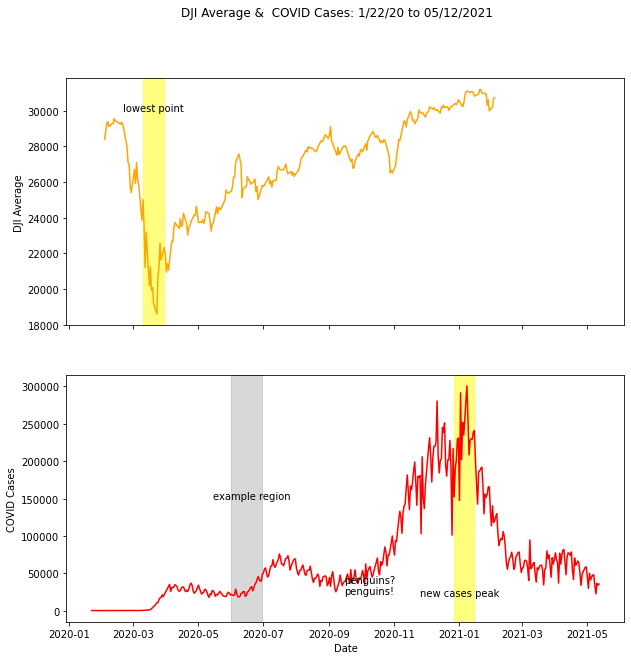

In [234]:
# your solution here
# modify this block in the remaining parts of the problem 

# subplots with same x axis
fig, ax = plt.subplots(2, sharex = True, figsize = (10, 10))

#title and labels
fig.suptitle("DJI Average &  COVID Cases: 1/22/20 to 05/12/2021") 
plt.xlabel("Date")
ax[0].axes.set_ylabel('DJI Average')
ax[1].axes.set_ylabel('COVID Cases')

#averages vs dates for both DJI and COVID
ax[0].plot(DJI['date'], DJI['Close'], color = "orange") 
ax[1].plot(per_day_date, per_day, color = "red")

# highlighted regions
ax[0].axvspan(datetime.datetime(2020,3,10), datetime.datetime(2020,3,30),alpha = .5,color = "yellow") 
ax[0].text(datetime.datetime(2020,2,20),30000,"lowest point")
ax[1].axvspan(datetime.datetime(2020,12,27), datetime.datetime(2021,1,15),alpha = .5,color = "yellow") 
ax[1].axvspan(datetime.datetime(2020,6,1),datetime.datetime(2020,6,30), alpha = .3, color = "gray")
ax[1].text(datetime.datetime(2020,9,15), 22000, "penguins?\npenguins!")
ax[1].text(datetime.datetime(2020,11,25),20000,"new cases peak")
ax[1].text(datetime.datetime(2020,5,15),150000,"example region")


## Part C

The command 

```
ax[0].axvspan(datetime.datetime(2020,6,1),
              datetime.datetime(2020,6,30), 
              alpha = .3, 
              color = "gray")
```

will add a simple rectangular shade which can be used to highlight specific portions of a time-series. In the given code, this shade runs through the month of June 2020. Add at least two such rectangular shades to your figure corresponding to important time intervals. You can put two shades on one axis, or one on each. If you're not sure what time periods are important, just choose intervals at random. Feel free to modify the color and transparency as desired. You can modify your figure code from Part B -- no need for copy/paste. 

## Part D

The command 

```
ax[0].text(datetime.datetime(2020,9,15), 
           22000, 
           "penguins?\npenguins!")
```

will add a fun text annotation to your plot, with the first letter in horizontal position corresponding to September 15th, and at vertical position 22,000. Annotate each of your shaded regions with a few words describing their significance. Again, just modify your Part B code. 

## Part E

Add an overall title, spruce up your axis labels, and add anything else you think will make the plot look good. Again, you can just modify your Part B code, without copy/paste. 

Then, submit a job application at www.FiveThirtyEight.com and show Nate Silver your cool data visualization.  